# Exploratory Data Analysis (EDA)

Create visualizations of frequency distributions and key insights from the cleaned insurance data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported")

✓ Libraries imported


## Load Processed Data

In [3]:
# Load the processed data from previous notebook
df = pd.read_csv("../data/processed/processed.csv")

print(f"Loaded dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

# Convert categorical columns to category dtype to avoid warnings
categorical_cols = ['DrivAge_group', 'VehAge_group']
for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')

Loaded dataset shape: (678013, 15)
Columns: ['IDpol', 'ClaimNb', 'Exposure', 'Area', 'VehPower', 'VehAge', 'DrivAge', 'BonusMalus', 'VehBrand', 'VehGas', 'Density', 'Region', 'freq', 'DrivAge_group', 'VehAge_group']


## Main Frequency Distributions

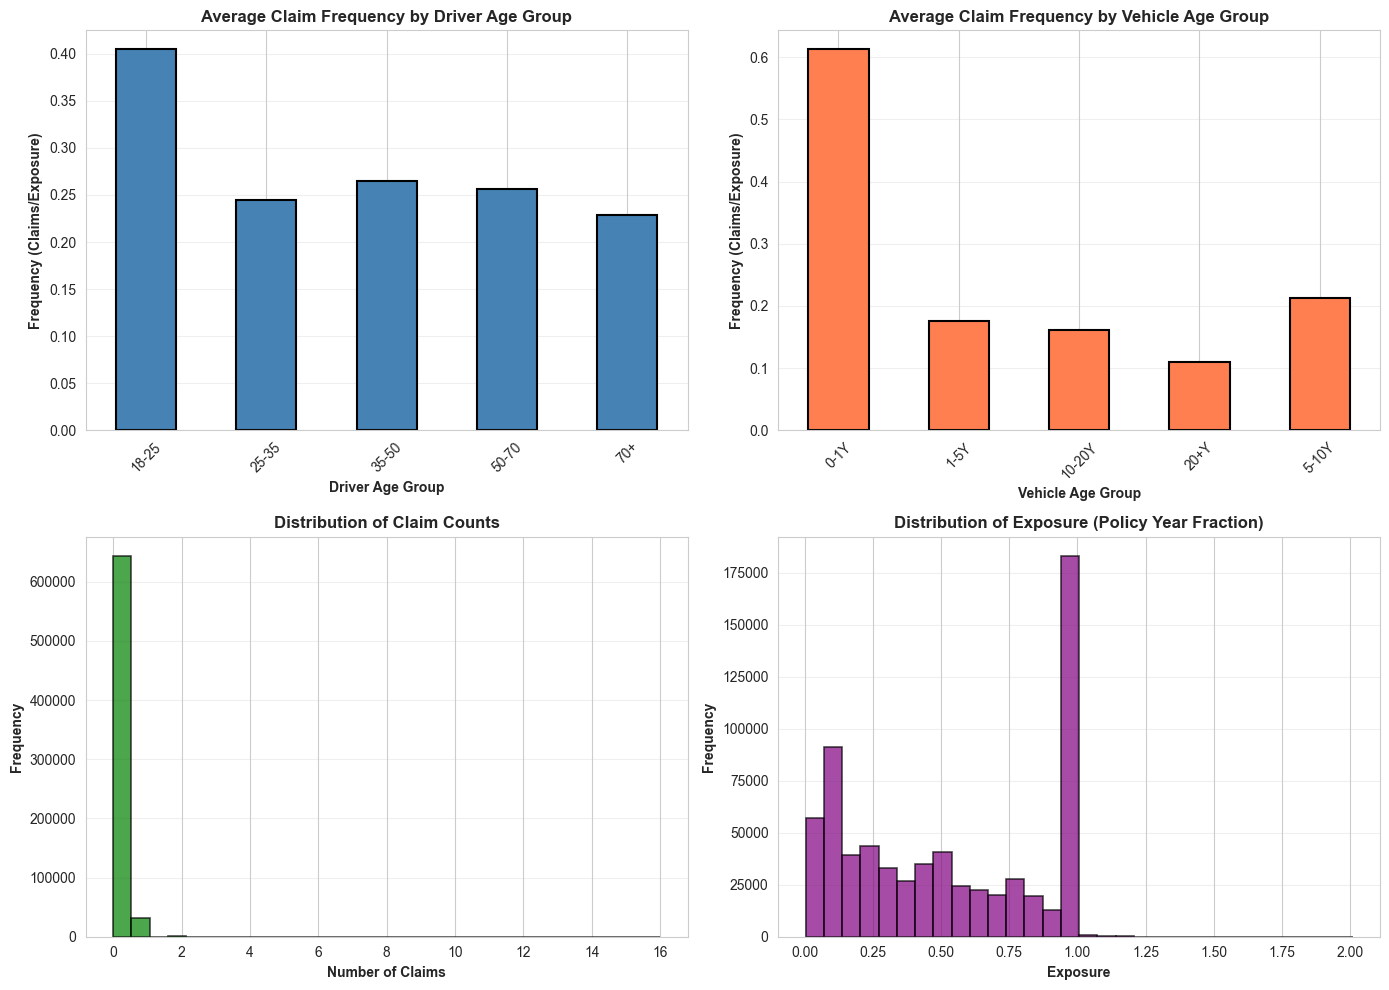

✓ SAVED: ../results/01_EDA_Frequency_Distributions.png


In [4]:
# Create EDA visualizations - 4 panel plot with frequency distributions
fig_eda, axes_eda = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Average Claim Frequency by Driver Age
driver_age_means = df.groupby("DrivAge_group", observed=True)["freq"].mean()
driver_age_means.plot(kind='bar', ax=axes_eda[0, 0], color='steelblue', edgecolor='black', linewidth=1.5)
axes_eda[0, 0].set_title('Average Claim Frequency by Driver Age Group', fontsize=12, fontweight='bold')
axes_eda[0, 0].set_ylabel('Frequency (Claims/Exposure)', fontsize=10, fontweight='bold')
axes_eda[0, 0].set_xlabel('Driver Age Group', fontsize=10, fontweight='bold')
axes_eda[0, 0].grid(True, alpha=0.3, axis='y')
axes_eda[0, 0].tick_params(axis='x', rotation=45)

# Panel 2: Average Claim Frequency by Vehicle Age
vehicle_age_means = df.groupby("VehAge_group", observed=True)["freq"].mean()
vehicle_age_means.plot(kind='bar', ax=axes_eda[0, 1], color='coral', edgecolor='black', linewidth=1.5)
axes_eda[0, 1].set_title('Average Claim Frequency by Vehicle Age Group', fontsize=12, fontweight='bold')
axes_eda[0, 1].set_ylabel('Frequency (Claims/Exposure)', fontsize=10, fontweight='bold')
axes_eda[0, 1].set_xlabel('Vehicle Age Group', fontsize=10, fontweight='bold')
axes_eda[0, 1].grid(True, alpha=0.3, axis='y')
axes_eda[0, 1].tick_params(axis='x', rotation=45)

# Panel 3: Distribution of Claim Counts
axes_eda[1, 0].hist(df["ClaimNb"], bins=30, color='green', alpha=0.7, edgecolor='black', linewidth=1.2)
axes_eda[1, 0].set_title('Distribution of Claim Counts', fontsize=12, fontweight='bold')
axes_eda[1, 0].set_xlabel('Number of Claims', fontsize=10, fontweight='bold')
axes_eda[1, 0].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes_eda[1, 0].grid(True, alpha=0.3, axis='y')

# Panel 4: Distribution of Exposure
axes_eda[1, 1].hist(df["Exposure"], bins=30, color='purple', alpha=0.7, edgecolor='black', linewidth=1.2)
axes_eda[1, 1].set_title('Distribution of Exposure (Policy Year Fraction)', fontsize=12, fontweight='bold')
axes_eda[1, 1].set_xlabel('Exposure', fontsize=10, fontweight='bold')
axes_eda[1, 1].set_ylabel('Frequency', fontsize=10, fontweight='bold')
axes_eda[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
output_file = '../results/01_EDA_Frequency_Distributions.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ SAVED: {output_file}")

## Key Insights - Advanced Visualizations

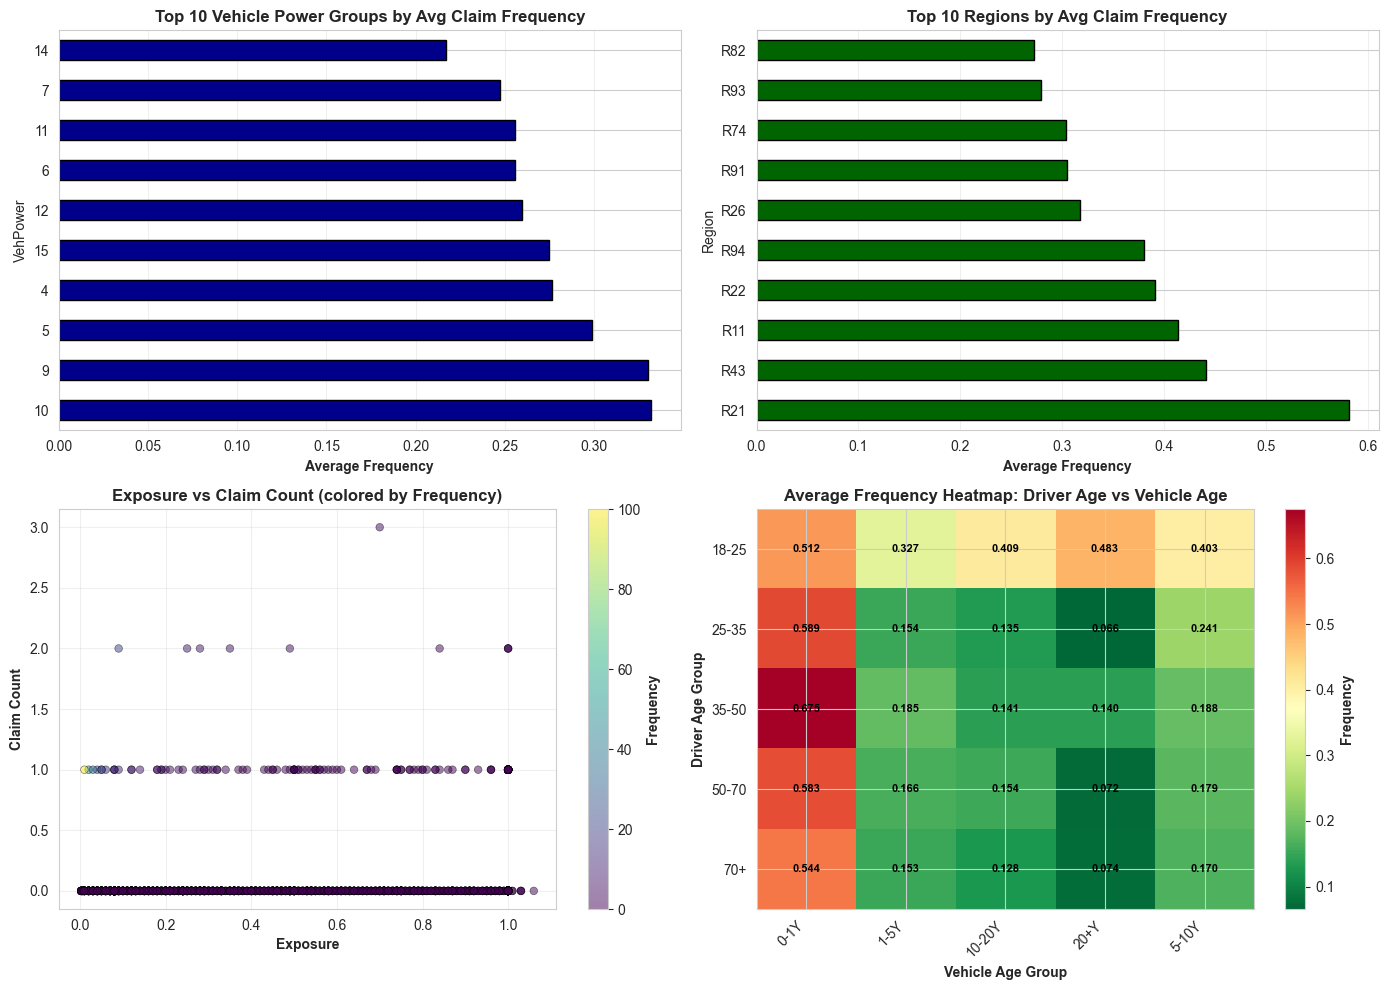

✓ SAVED: ../results/02_EDA_Key_Insights.png


In [5]:
# Additional EDA: Key insights visualization
fig_insights, axes_insights = plt.subplots(2, 2, figsize=(14, 10))

# Panel 1: Claims by Vehicle Power (Top 10)
top_power = df.groupby("VehPower")["freq"].mean().nlargest(10)
top_power.plot(kind='barh', ax=axes_insights[0, 0], color='darkblue', edgecolor='black')
axes_insights[0, 0].set_title('Top 10 Vehicle Power Groups by Avg Claim Frequency', fontsize=12, fontweight='bold')
axes_insights[0, 0].set_xlabel('Average Frequency', fontsize=10, fontweight='bold')
axes_insights[0, 0].grid(True, alpha=0.3, axis='x')

# Panel 2: Claims by Region (Top 10)
top_regions = df.groupby("Region")["freq"].mean().nlargest(10)
top_regions.plot(kind='barh', ax=axes_insights[0, 1], color='darkgreen', edgecolor='black')
axes_insights[0, 1].set_title('Top 10 Regions by Avg Claim Frequency', fontsize=12, fontweight='bold')
axes_insights[0, 1].set_xlabel('Average Frequency', fontsize=10, fontweight='bold')
axes_insights[0, 1].grid(True, alpha=0.3, axis='x')

# Panel 3: Exposure vs Claim Count Scatter
sample_data = df.sample(n=min(3000, len(df)), random_state=42)
scatter1 = axes_insights[1, 0].scatter(sample_data["Exposure"], sample_data["ClaimNb"], 
                                        alpha=0.5, s=30, c=sample_data["freq"], cmap='viridis', edgecolors='black', linewidth=0.5)
axes_insights[1, 0].set_title('Exposure vs Claim Count (colored by Frequency)', fontsize=12, fontweight='bold')
axes_insights[1, 0].set_xlabel('Exposure', fontsize=10, fontweight='bold')
axes_insights[1, 0].set_ylabel('Claim Count', fontsize=10, fontweight='bold')
axes_insights[1, 0].grid(True, alpha=0.3)
cbar1 = plt.colorbar(scatter1, ax=axes_insights[1, 0])
cbar1.set_label('Frequency', fontweight='bold')

# Panel 4: Vehicle Age vs Driver Age Heatmap
freq_pivot = df.groupby(["DrivAge_group", "VehAge_group"], observed=True)["freq"].mean().unstack()
im = axes_insights[1, 1].imshow(freq_pivot.values, cmap='RdYlGn_r', aspect='auto')
axes_insights[1, 1].set_xticks(range(len(freq_pivot.columns)))
axes_insights[1, 1].set_yticks(range(len(freq_pivot.index)))
axes_insights[1, 1].set_xticklabels(freq_pivot.columns, rotation=45, ha='right')
axes_insights[1, 1].set_yticklabels(freq_pivot.index)
axes_insights[1, 1].set_title('Average Frequency Heatmap: Driver Age vs Vehicle Age', fontsize=12, fontweight='bold')
axes_insights[1, 1].set_xlabel('Vehicle Age Group', fontsize=10, fontweight='bold')
axes_insights[1, 1].set_ylabel('Driver Age Group', fontsize=10, fontweight='bold')
cbar2 = plt.colorbar(im, ax=axes_insights[1, 1])
cbar2.set_label('Frequency', fontweight='bold')

# Add frequency values to heatmap cells
for i in range(len(freq_pivot.index)):
    for j in range(len(freq_pivot.columns)):
        text = axes_insights[1, 1].text(j, i, f'{freq_pivot.values[i, j]:.3f}',
                                       ha="center", va="center", color="black", fontsize=8, fontweight='bold')

plt.tight_layout()
output_file = '../results/02_EDA_Key_Insights.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
plt.show()
print(f"✓ SAVED: {output_file}")

## Summary Statistics by Groups

In [6]:
print("\n" + "=" * 80)
print("SUMMARY: KEY FINDINGS FROM EDA")
print("=" * 80)

print(f"\nDataset Overview:")
print(f"  Total records: {len(df):,}")
print(f"  Total claims: {df['ClaimNb'].sum():,.0f}")
print(f"  Total exposure: {df['Exposure'].sum():,.2f}")
print(f"  Overall frequency: {df['ClaimNb'].sum() / df['Exposure'].sum():.6f}")

print(f"\nDriver Age Group Statistics:")
print(df.groupby("DrivAge_group", observed=True)["freq"].agg(['mean', 'std', 'count']).round(6))

print(f"\nVehicle Age Group Statistics:")
print(df.groupby("VehAge_group", observed=True)["freq"].agg(['mean', 'std', 'count']).round(6))


SUMMARY: KEY FINDINGS FROM EDA

Dataset Overview:
  Total records: 678,013
  Total claims: 36,102
  Total exposure: 358,499.45
  Overall frequency: 0.100703

Driver Age Group Statistics:
                   mean       std   count
DrivAge_group                            
18-25          0.404561  4.737294   38895
25-35          0.245015  4.322840  149183
35-50          0.265029  4.987477  251693
50-70          0.256378  4.393094  198877
70+            0.228376  3.732235   39365

Vehicle Age Group Statistics:
                  mean       std   count
VehAge_group                            
0-1Y          0.612589  8.101648  129023
1-5Y          0.175993  3.382571  191614
10-20Y        0.161794  2.603155  177460
20+Y          0.110563  2.453202    8322
5-10Y         0.213167  3.720776  171594
